In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.misc import imread

In [2]:
plt.style.use('ggplot')
%matplotlib inline
plt.rcParams['figure.figsize'] = (20,10) # set default size of plots

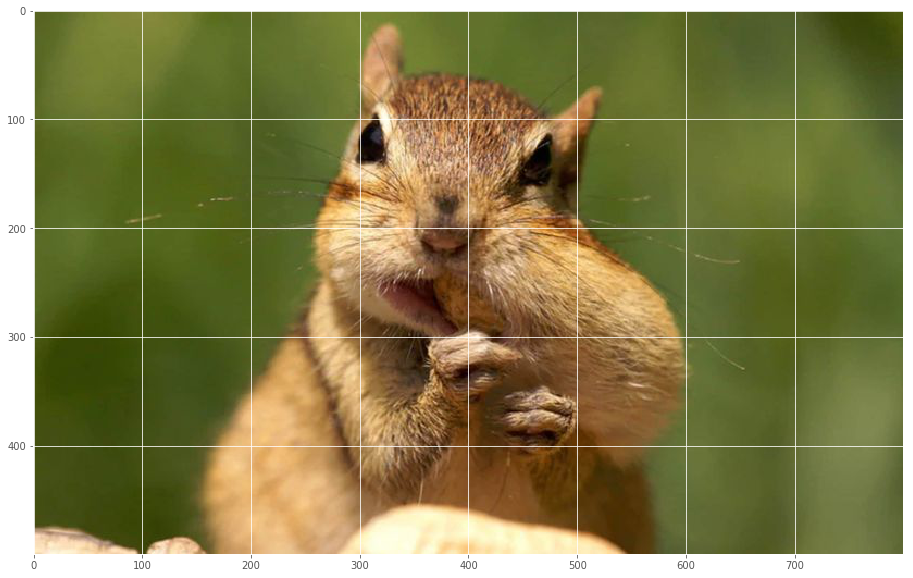

In [4]:
image=imread('img1.jpg',mode='RGB')
plt.imshow(image)

## Загрузим изображение

## Свёртки

Реализуйте функцию применяющую ядро kernel к изображению input_image. Для простоты, не будем делать padding, зафиксируем stride равным единице, а ядро свёртки будем считать квадратной матрицей (не трёхмерным тензором!) и приминять к каждому каналу независимо.

In [5]:
def conv2d(img, K):
    h, w, d = img.shape
    k_h, k_w = K.shape
   
    # Впишите свой код на месте заглушки
    result = np.zeros((h-k_h,w-k_w,d))
    hr = range(h-k_h)
    wr = range(w-k_w)
    c = range(d)
    print(hr,wr,c)
                          
    for y in hr:
        for x in wr:
            #print((y,x))
            fr = img[y:y+k_h,x:x+k_w]
            
            #print("frame :",fr.shape)
            for c in range(d):
                #print('\tmat',(y,x,c))
                #print('frame',fr[c])
                #buf = [x/255 for x in fr[c]]
                a = np.multiply(fr[:,:,c],K)
                #print('prod',a)
                result[y][x][c] = sum(a.flat)
                #print(result[y][x][c])
                
            
    return result

In [6]:
K = np.zeros((3,3))
K[1][1] = 1
print(K, K.shape)

[[ 0.  0.  0.]
 [ 0.  1.  0.]
 [ 0.  0.  0.]] (3, 3)


In [7]:
same_image = conv2d(image, K)

range(0, 497) range(0, 797) range(0, 3)


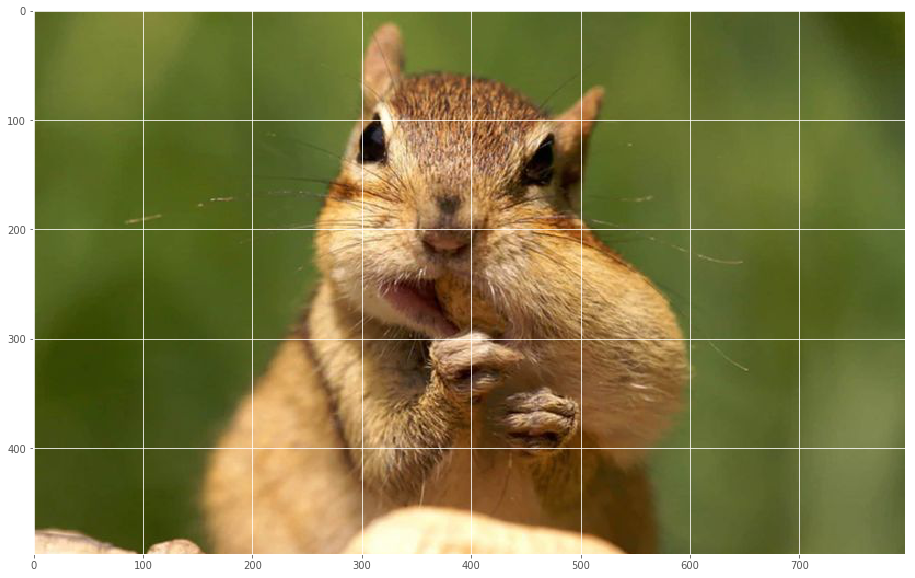

In [8]:
plt.imshow(same_image.astype(np.uint8))

Опишите ядро свёртки, выполняющее размытие

In [9]:
blur_kernel = np.zeros((3,3))
blur_kernel[0,0]=10
blur_kernel[2,2]=10
#blur_kernel = np.array([[10,0,0],[0,0,0],[0,0,10]])
blur_kernel = blur_kernel/sum(blur_kernel.flat)
print(blur_kernel, blur_kernel.shape)

[[ 0.5  0.   0. ]
 [ 0.   0.   0. ]
 [ 0.   0.   0.5]] (3, 3)


In [10]:
blurry_image =  conv2d(image, blur_kernel)

range(0, 497) range(0, 797) range(0, 3)


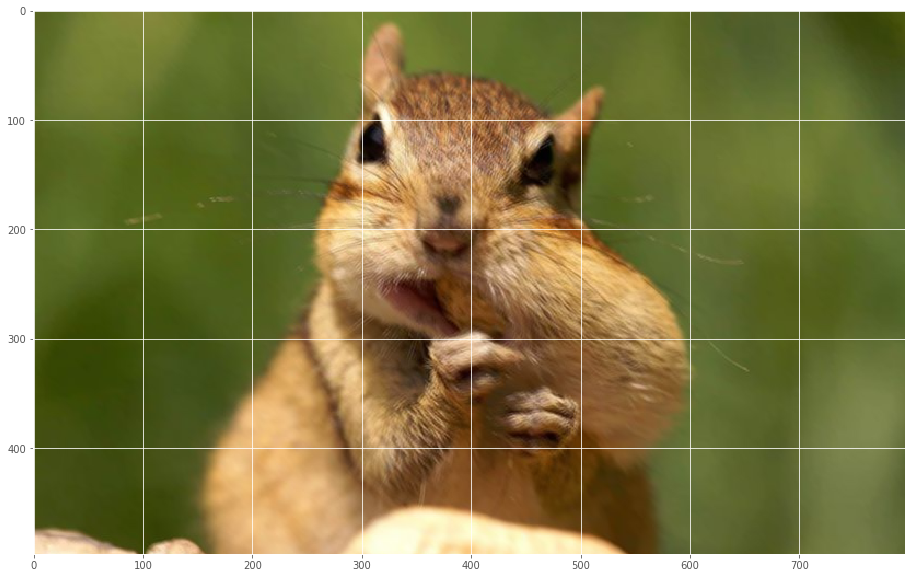

In [11]:
plt.imshow(blurry_image.astype(np.uint8))

А теперь подсветите границы объектов на изображении

In [12]:
edge_kernel = np.zeros((3,3))
edge_kernel = np.array([[.5,0,0],[0,0,0],[0,0,-.5]])
edge_kernel = edge_kernel#/sum(edge_kernel.flat)
print(edge_kernel)

[[ 0.5  0.   0. ]
 [ 0.   0.   0. ]
 [ 0.   0.  -0.5]]


In [13]:
edge_image =  conv2d(image, edge_kernel)

range(0, 497) range(0, 797) range(0, 3)


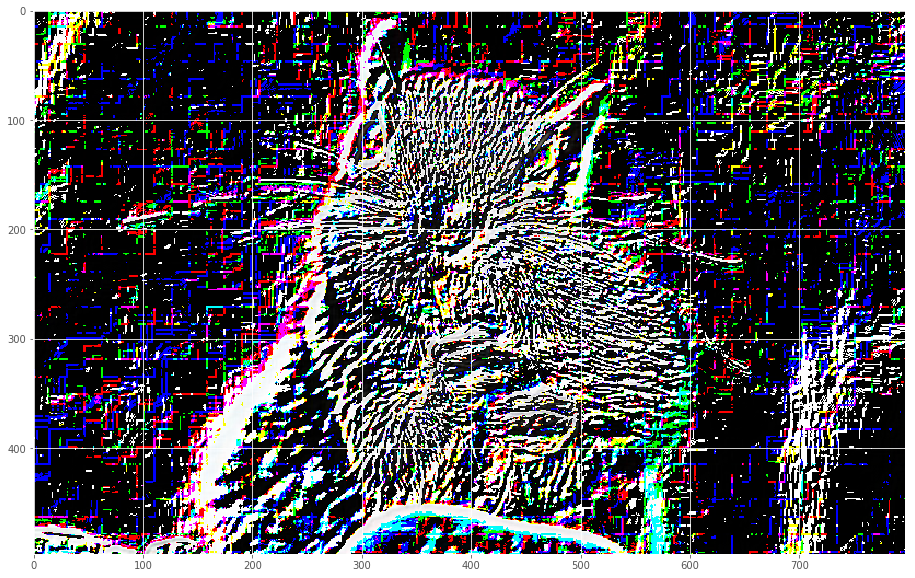

In [14]:
plt.imshow(edge_image.astype(np.uint8))

Кажется, что-то пошло не так... Возможно, необходимо сделать что-то ещё?